# Travaux Pratiques : analyse et prédiction de la météo

Étude d'un jeu de données comportant des informations sur la météo.

Dans un premier temps, nous ferons une étude exploratoire pour se familiariser avec la donnée et comprendre comment les variables se comportent.

Dans un second temps, nous nous attacherons à l'explicabilité des données.

Enfin, nous entrainerons un modèle de Machine Learning (Random Forest) sur des données d'entrainement et nous prédirons sur des données de test afin d'évaluer les performances du modèle. Nous daisons un recherche des meilleurs paramètres de ce dernier avant enfin de le compararer à une SVC et à une regression logistique


**Certains résultats non pertinents sont délibérément éffacés à cause de la longeur du fichier pdf**

In [ ]:
# Import des librairies

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
file_path = 'meteo.csv'
dataset = pd.read_csv(file_path)
dataset.shape

(1244, 47)

In [ ]:
pd.set_option('display.max_columns', 50)

In [ ]:
# Visualiser les 15 premières lignes du dataset
dataset.head(10)

,Unnamed: 0,Year,Month,Day,Hour,Minute,Temperature.daily.mean..2.m.above.gnd.,Relative.Humidity.daily.mean..2.m.above.gnd.,Mean.Sea.Level.Pressure.daily.mean..MSL.,Total.Precipitation.daily.sum..sfc.,Snowfall.amount.raw.daily.sum..sfc.,Total.Cloud.Cover.daily.mean..sfc.,High.Cloud.Cover.daily.mean..high.cld.lay.,Medium.Cloud.Cover.daily.mean..mid.cld.lay.,Low.Cloud.Cover.daily.mean..low.cld.lay.,Sunshine.Duration.daily.sum..sfc.,Shortwave.Radiation.daily.sum..sfc.,Wind.Speed.daily.mean..10.m.above.gnd.,Wind.Direction.daily.mean..10.m.above.gnd.,Wind.Speed.daily.mean..80.m.above.gnd.,Wind.Direction.daily.mean..80.m.above.gnd.,Wind.Speed.daily.mean..900.mb.,Wind.Direction.daily.mean..900.mb.,Wind.Gust.daily.mean..sfc.,Temperature.daily.max..2.m.above.gnd.,Temperature.daily.min..2.m.above.gnd.,Relative.Humidity.daily.max..2.m.above.gnd.,Relative.Humidity.daily.min..2.m.above.gnd.,Mean.Sea.Level.Pressure.daily.max..MSL.,Mean.Sea.Level.Pressure.daily.min..MSL.,Total.Cloud.Cover.daily.max..sfc.,Total.Cloud.Cover.daily.min..sfc.,High.Cloud.Cover.daily.max..high.cld.lay.,High.Cloud.Cover.daily.min..high.cld.lay.,Medium.Cloud.Cover.daily.max..mid.cld.lay.,Medium.Cloud.Cover.daily.min..mid.cld.lay.,Low.Cloud.Cover.daily.max..low.cld.lay.,Low.Cloud.Cover.daily.min..low.cld.lay.,Wind.Speed.daily.max..10.m.above.gnd.,Wind.Speed.daily.min..10.m.above.gnd.,Wind.Speed.daily.max..80.m.above.gnd.,Wind.Speed.daily.min..80.m.above.gnd.,Wind.Speed.daily.max..900.mb.,Wind.Speed.daily.min..900.mb.,Wind.Gust.daily.max..sfc.,Wind.Gust.daily.min..sfc.,pluie.demain
0,1,2010,6,1,0,0,13.45,77.88,1015.76,0.1,0.0,65.04,33.12,36.88,45.08,350.81,5721.81,8.97,280.93,11.61,279.54,14.56,318.28,12.21,17.57,8.10,96,61,1018.4,1013.1,100.0,1.0,100,0,100,0,100,0,14.06,2.41,21.61,1.44,28.77,4.39,23.40,3.24,True
1,3,2010,6,3,0,0,14.27,83.58,1016.39,0.0,0.0,80.95,31.62,10.83,80.54,68.66,3551.10,8.61,220.96,11.64,228.49,22.92,75.29,12.76,18.17,10.32,96,71,1017.5,1015.3,100.0,3.3,100,0,100,0,100,0,15.26,2.74,20.47,3.71,40.76,2.10,24.12,3.24,False
2,5,2010,6,5,0,0,19.88,66.58,1018.18,0.0,0.0,0.00,0.00,0.00,0.00,891.68,8284.12,4.47,171.87,6.17,194.00,10.59,167.13,5.57,25.61,12.35,88,47,1020.7,1015.7,0.0,0.0,0,0,0,0,0,0,8.71,0.51,18.67,0.72,21.97,0.51,15.84,0.72,True
3,7,2010,6,7,0,0,19.31,72.00,1013.60,0.4,0.0,49.69,24.12,24.33,49.25,666.70,7455.53,10.05,258.72,12.64,281.44,19.90,276.32,16.94,22.65,15.27,91,54,1015.8,1010.3,100.0,0.3,100,0,100,0,100,0,16.62,0.51,20.88,0.72,41.41,3.60,32.76,0.72,True
4,9,2010,6,9,0,0,22.06,74.29,1005.01,2.0,0.0,58.77,48.42,54.67,22.17,400.71,6531.71,10.73,176.58,14.20,173.14,16.60,207.83,11.99,27.88,15.47,89,49,1006.7,1003.2,100.0,3.0,100,7,100,0,100,0,21.65,3.22,27.57,2.16,25.92,4.02,27.72,3.24,False
5,11,2010,6,11,0,0,20.85,76.21,1009.33,1.4,0.0,49.75,0.21,9.42,49.75,537.00,6748.87,6.36,237.02,8.11,237.73,11.71,228.86,9.48,24.38,16.45,97,61,1010.7,1006.2,100.0,0.0,5,0,100,0,100,0,27.76,0.72,33.53,0.80,34.58,0.80,41.04,1.08,True
6,13,2010,6,13,0,0,16.13,86.12,1013.63,5.1,0.0,92.08,11.04,60.92,91.67,0.00,2350.49,8.62,300.68,12.32,306.51,9.53,240.93,11.31,17.73,13.64,96,78,1014.7,1012.2,100.0,0.0,100,0,100,0,100,0,12.03,4.68,20.16,6.48,19.49,0.00,22.32,5.76,True
7,15,2010,6,15,0,0,15.94,87.92,1014.41,8.2,0.0,77.60,50.75,53.67,75.04,29.27,2675.34,9.94,164.11,12.22,156.58,27.77,75.56,13.24,20.42,11.98,96,75,1015.7,1013.1,100.0,0.0,100,0,100,0,100,0,17.73,1.80,20.57,2.04,42.05,14.78,24.48,2.88,True
8,17,2010,6,17,0,0,15.04,90.71,1012.70,4.8,0.0,100.00,28.54,45.33,100.00,0.00,2255.26,8.03,310.06,9.85,316.59,15.15,197.46,9.81,17.58,13.18,97,78,1013.4,1012.2,100.0,100.0,100,0,100,0,100,100,11.97,3.71,18.95,5.96,28.34,2.90,31.68,4.32,True
9,19,2010,6,19,0,0,12.54,82.38,1009.01,5.3,0.0,82.57,64.08,63.17,63.79,164.07,3157.72,12.48,311.60,17.21,320.70,21.23,310.99,17.11,14.13,10.64,94,69,1011.1,1007.8,100.0,1.0,100,0,100,0,100,0,19.39,5.59,23.11,11.92,28.55,14.58,28.08,8.28,True


Toutes les colonnes semblent propres et il n'y a à priori pas de clean à faire.

In [ ]:
# Afficher le nom des colonnes du dataset
dataset.columns

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1244 entries, 0 to 1243
Data columns (total 47 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Unnamed: 0                                    1244 non-null   int64  
 1   Year                                          1244 non-null   int64  
 2   Month                                         1244 non-null   int64  
 3   Day                                           1244 non-null   int64  
 4   Hour                                          1244 non-null   int64  
 5   Minute                                        1244 non-null   int64  
 6   Temperature.daily.mean..2.m.above.gnd.        1244 non-null   float64
 7   Relative.Humidity.daily.mean..2.m.above.gnd.  1244 non-null   float64
 8   Mean.Sea.Level.Pressure.daily.mean..MSL.      1244 non-null   float64
 9   Total.Precipitation.daily.sum..sfc.           1244 non-null   f

On observe qu'il n'y a pas de valeurs manquantes à traiter.  
Par ailleurs, il y a 3 format de données:
- int64: nombres entiers relatifs
- float64: nombres décimaux
- bool : variable booléenne (vaut 0 ou 1)

# Traitement de la donnée

## Colonnes inutiles

In [ ]:
# Afficher la fréquence des Unnamed: 0.
dataset['Unnamed: 0'].value_counts()

1       1
1937    1
1955    1
1953    1
1949    1
       ..
951     1
949     1
947     1
945     1
2941    1
Name: Unnamed: 0, Length: 1244, dtype: int64

Il s'agit d'une colonne rajoutée par python et qui permet visiblement d'identifier uniquement chaque ligne. On pourrait la supprimer.

In [ ]:
# Afficher la fréquence des heures
dataset['Hour'].value_counts()

0    1244
Name: Hour, dtype: int64

In [ ]:
# Afficher la fréquence des Minutes
dataset['Minute'].value_counts()

0    1244
Name: Minute, dtype: int64

- Heure et Minute sont des colonnes non remplies et qui en soit n'ont aucune importance dans la prédiction. On pourrait donc juste se débarasser d'elles aussi.

- Par ailleurs dans la prédiction, le jour et l'année ne sont pas importantes ou plutôt capitale. En effet, nous prédirons sur des années qui ne sont pas dans le dataset. Et le jour quant à, il n'y a pas spécialement de raison pour qu'il y ait pluie un jour plus qu'un autre. Nous supprimerons donc ces deux aussi.

## Cardinalité

In [ ]:
# Combien de valeurs uniques possède chaque colonne ?
dataset.nunique().sort_values()

Rien ne peut spécifiquement être conclu ici qui n'ait précédemment été dit. Nous nous assurerons quand même que les variables qui ont la même cardinalité ne sont pas les mêmes. Leurs noms nous disent qu'à priori non.

In [ ]:
# Les colonnes ne sont pas identiques, on gardera les 2.
dataset['Relative.Humidity.daily.max..2.m.above.gnd.'].equals(dataset['Low.Cloud.Cover.daily.min..low.cld.lay.'])

False

In [ ]:
dataset['Relative.Humidity.daily.max..2.m.above.gnd.'].value_counts()

In [ ]:
dataset['Low.Cloud.Cover.daily.min..low.cld.lay.'].value_counts()

Les deux variables ne sont pas donc identiques.

In [ ]:
# Bilan des variables à supprimer
to_remove = [
    'Hour', 'Year', 'Unnamed: 0',
    'Minute', 'Day'
    ]

Toutes les variables qui restent sont numériques visiblement ici. Sauf le mois qui peut être considérée comme catégoricielle

In [ ]:
categorique = ['Month']
columns_to_exclude = to_remove + categorique + ['pluie.demain']
numerique = dataset.columns.difference(columns_to_exclude)
print(categorique)
print('------------------------------------------------')
print(numerique)

In [ ]:
print(len(numerique))

40


# Analyse descriptive des variables qualitatives ou cayégoricielles

Nous commençons par la variable cible : savoir si'il y a pluie demain ou pas

In [ ]:
dataset['pluie.demain'].value_counts()

False    625
True     619
Name: pluie.demain, dtype: int64

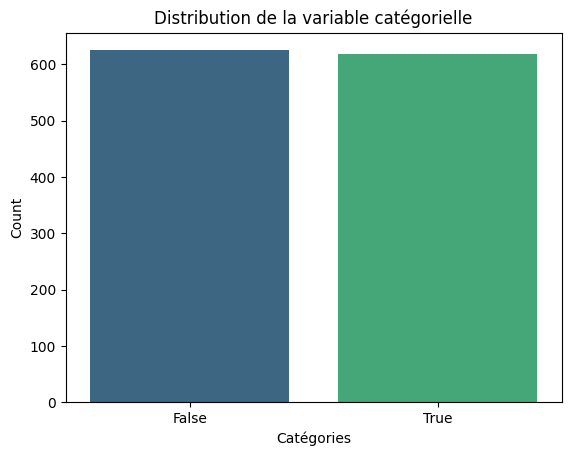

In [ ]:
# Créer un diagramme en barres pour visualiser la distribution de la variable catégorielle
sns.countplot(x='pluie.demain', data=dataset, palette='viridis')

# Ajouter des étiquettes
plt.title('Distribution de la variable catégorielle')
plt.xlabel('Catégories')
plt.ylabel('Count')

# Afficher le graphique
plt.show()

Le label est bien réparti en terme de proportion.

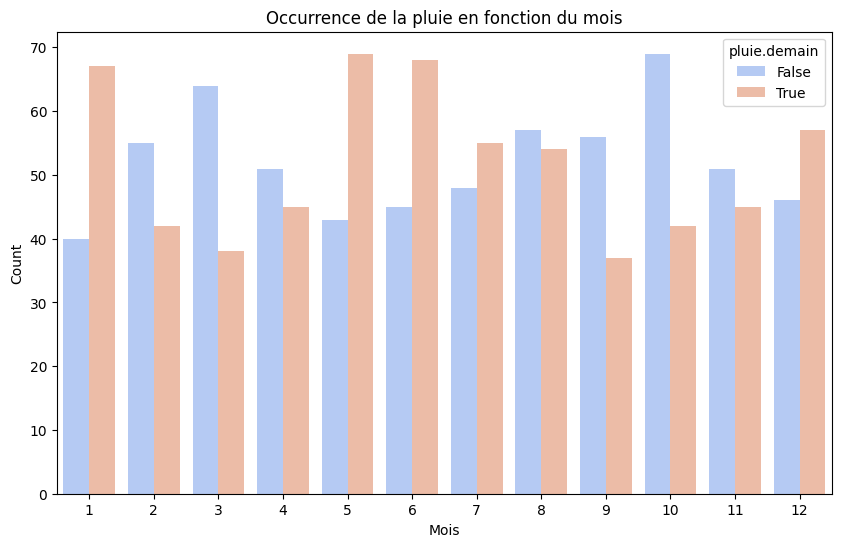

In [ ]:
# Créer un diagramme en barres pour visualiser l'occurrence de la pluie en fonction du mois
plt.figure(figsize=(10, 6))
sns.countplot(x='Month', hue='pluie.demain', data=dataset, palette='coolwarm')

# Ajouter des étiquettes
plt.title('Occurrence de la pluie en fonction du mois')
plt.xlabel('Mois')
plt.ylabel('Count')

# Afficher le graphique
plt.show()


Janvier, Mai, Juin sont visiblement les mois où il pleut le plus. Tandis que Mars, Septembre et Octobre sont relativement des mois où il ne pleut pas beaucoup. On note déjà une sorte de corrélation entre le mois et l'occurence de la pluie.

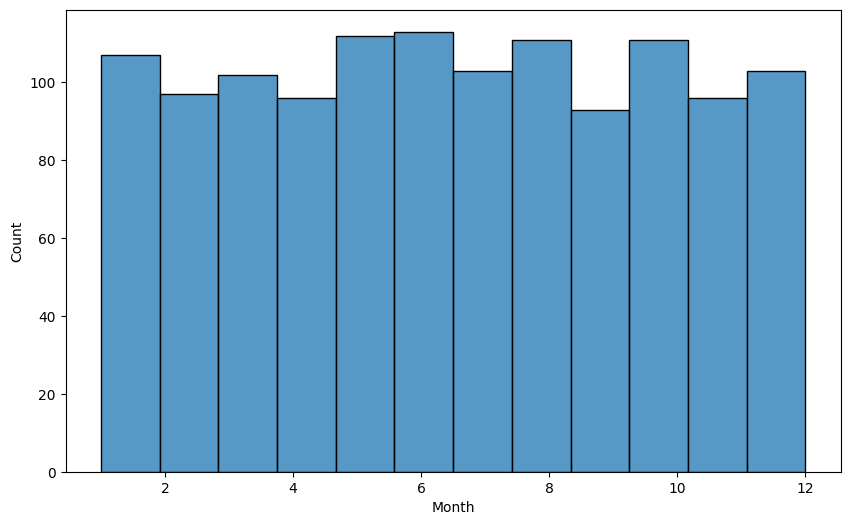

In [ ]:
plt.rcParams["figure.figsize"]

fig, axs = plt.subplots(figsize=(10,6))
sns.histplot(dataset['Month'])
plt.show()

Ce graphique confirme qu'aucun moi n'est surreprésenté par rapport aux autres

# Analyse descriptive des variables quantitatives ou cayégoricielles

In [ ]:
dataset[numerique].describe()

,High.Cloud.Cover.daily.max..high.cld.lay.,High.Cloud.Cover.daily.mean..high.cld.lay.,High.Cloud.Cover.daily.min..high.cld.lay.,Low.Cloud.Cover.daily.max..low.cld.lay.,Low.Cloud.Cover.daily.mean..low.cld.lay.,Low.Cloud.Cover.daily.min..low.cld.lay.,Mean.Sea.Level.Pressure.daily.max..MSL.,Mean.Sea.Level.Pressure.daily.mean..MSL.,Mean.Sea.Level.Pressure.daily.min..MSL.,Medium.Cloud.Cover.daily.max..mid.cld.lay.,Medium.Cloud.Cover.daily.mean..mid.cld.lay.,Medium.Cloud.Cover.daily.min..mid.cld.lay.,Relative.Humidity.daily.max..2.m.above.gnd.,Relative.Humidity.daily.mean..2.m.above.gnd.,Relative.Humidity.daily.min..2.m.above.gnd.,Shortwave.Radiation.daily.sum..sfc.,Snowfall.amount.raw.daily.sum..sfc.,Sunshine.Duration.daily.sum..sfc.,Temperature.daily.max..2.m.above.gnd.,Temperature.daily.mean..2.m.above.gnd.,Temperature.daily.min..2.m.above.gnd.,Total.Cloud.Cover.daily.max..sfc.,Total.Cloud.Cover.daily.mean..sfc.,Total.Cloud.Cover.daily.min..sfc.,Total.Precipitation.daily.sum..sfc.,Wind.Direction.daily.mean..10.m.above.gnd.,Wind.Direction.daily.mean..80.m.above.gnd.,Wind.Direction.daily.mean..900.mb.,Wind.Gust.daily.max..sfc.,Wind.Gust.daily.mean..sfc.,Wind.Gust.daily.min..sfc.,Wind.Speed.daily.max..10.m.above.gnd.,Wind.Speed.daily.max..80.m.above.gnd.,Wind.Speed.daily.max..900.mb.,Wind.Speed.daily.mean..10.m.above.gnd.,Wind.Speed.daily.mean..80.m.above.gnd.,Wind.Speed.daily.mean..900.mb.,Wind.Speed.daily.min..10.m.above.gnd.,Wind.Speed.daily.min..80.m.above.gnd.,Wind.Speed.daily.min..900.mb.
count,1244.000000,1244.000000,1244.000000,1244.000000,1244.000000,1244.000000,1244.000000,1244.000000,1244.000000,1244.000000,1244.000000,1244.000000,1244.000000,1244.000000,1244.000000,1244.000000,1244.000000,1244.000000,1244.000000,1244.000000,1244.000000,1244.000000,1244.000000,1244.000000,1244.000000,1244.000000,1244.000000,1244.000000,1244.000000,1244.000000,1244.000000,1244.000000,1244.000000,1244.000000,1244.000000,1244.000000,1244.000000,1244.000000,1244.000000,1244.000000
mean,61.988746,19.745627,0.714630,80.847267,39.676632,4.550643,1019.806109,1017.014510,1014.157637,72.826367,31.283746,1.952572,87.904341,71.450595,54.197749,3945.695523,0.061559,377.430129,16.481214,12.226616,8.051150,89.075723,50.655651,8.499839,2.213505,202.085748,207.044043,208.693079,29.491640,16.791206,6.655370,19.218690,25.445466,42.257982,10.869035,14.393248,25.052211,3.681318,4.901037,11.371608
std,42.459709,20.846430,3.302854,37.416907,31.049154,18.747331,7.710762,7.962332,8.434403,41.296024,29.307614,10.413425,7.523394,9.419637,12.433228,2133.722943,0.595951,278.019402,7.768410,7.094412,6.467947,28.433104,31.444141,23.258957,4.301138,61.082622,61.560919,73.780444,15.163162,10.498474,7.486143,9.298039,10.742637,21.936074,6.179354,8.024190,16.148044,4.235600,6.157457,12.358915
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,981.400000,978.450000,976.100000,0.000000,0.000000,0.000000,55.000000,41.120000,21.000000,283.910000,0.000000,0.000000,-4.390000,-7.100000,-11.650000,0.000000,0.000000,0.000000,0.000000,34.510000,36.640000,29.220000,5.040000,2.710000,0.000000,4.610000,4.840000,6.130000,2.020000,2.110000,2.380000,0.000000,0.000000,0.000000
25%,18.000000,2.200000,0.000000,100.000000,8.490000,0.000000,1015.700000,1012.645000,1009.375000,34.750000,2.677500,0.000000,83.000000,65.110000,45.000000,2059.460000,0.000000,118.410000,10.655000,6.695000,2.997500,100.000000,22.205000,0.000000,0.000000,155.872500,158.845000,149.220000,19.080000,9.642500,2.160000,12.310000,18.190000,25.180000,6.567500,8.737500,13.387500,1.080000,1.125000,3.260000
50%,100.000000,13.230000,0.000000,100.000000,38.705000,0.000000,1019.500000,1016.965000,1014.400000,100.000000,23.770000,0.000000,89.000000,71.880000,54.000000,3576.020000,0.000000,371.545000,16.700000,12.575000,8.255000,100.000000,52.875000,0.000000,0.100000,208.990000,215.370000,237.395000,25.920000,13.835000,3.960000,17.330000,23.815000,37.935000,9.280000,12.375000,20.505000,2.310000,2.550000,7.150000
75%,100.00000

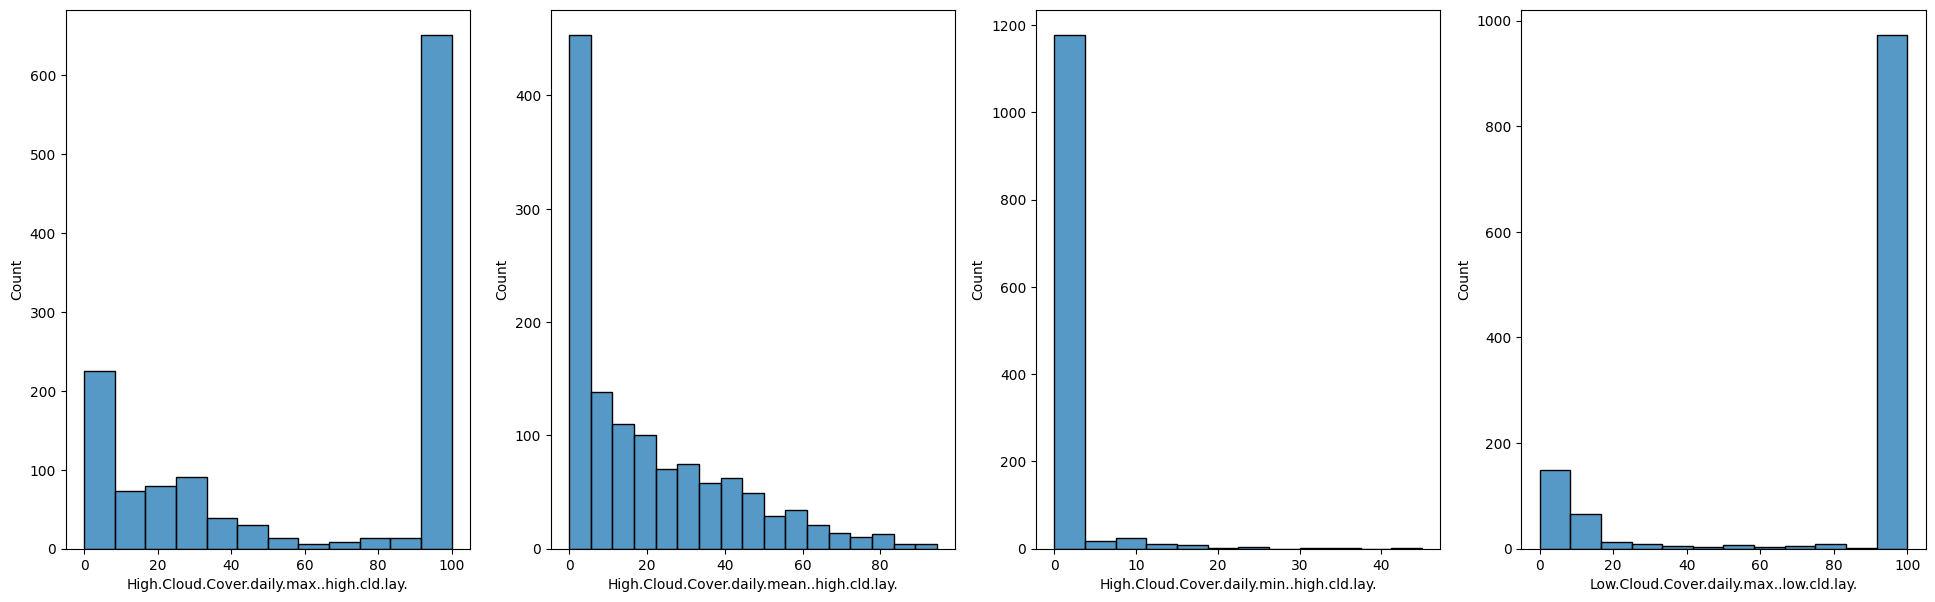

--------------------------------------------------------------------------------------------------------------------------------------------------------


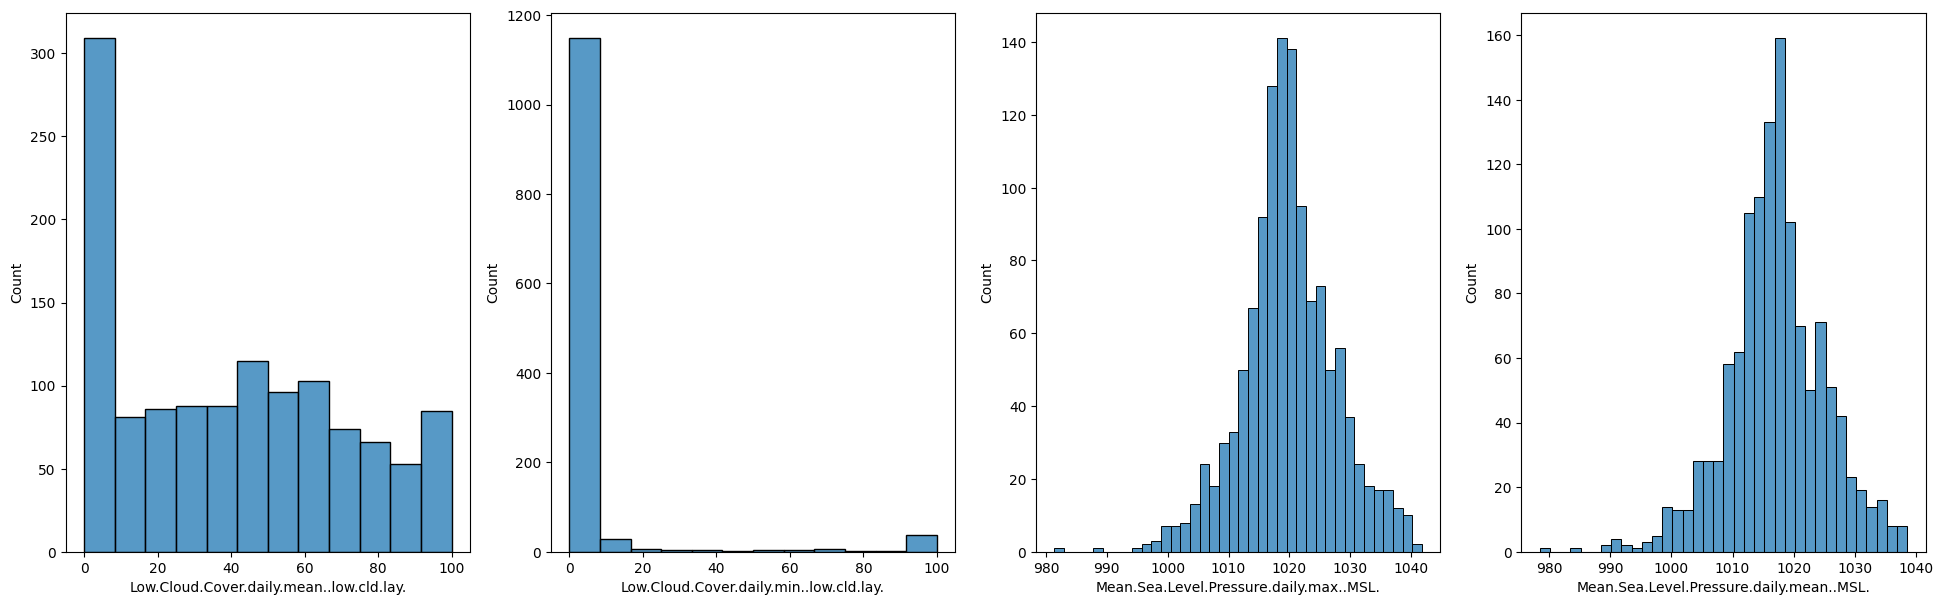

--------------------------------------------------------------------------------------------------------------------------------------------------------


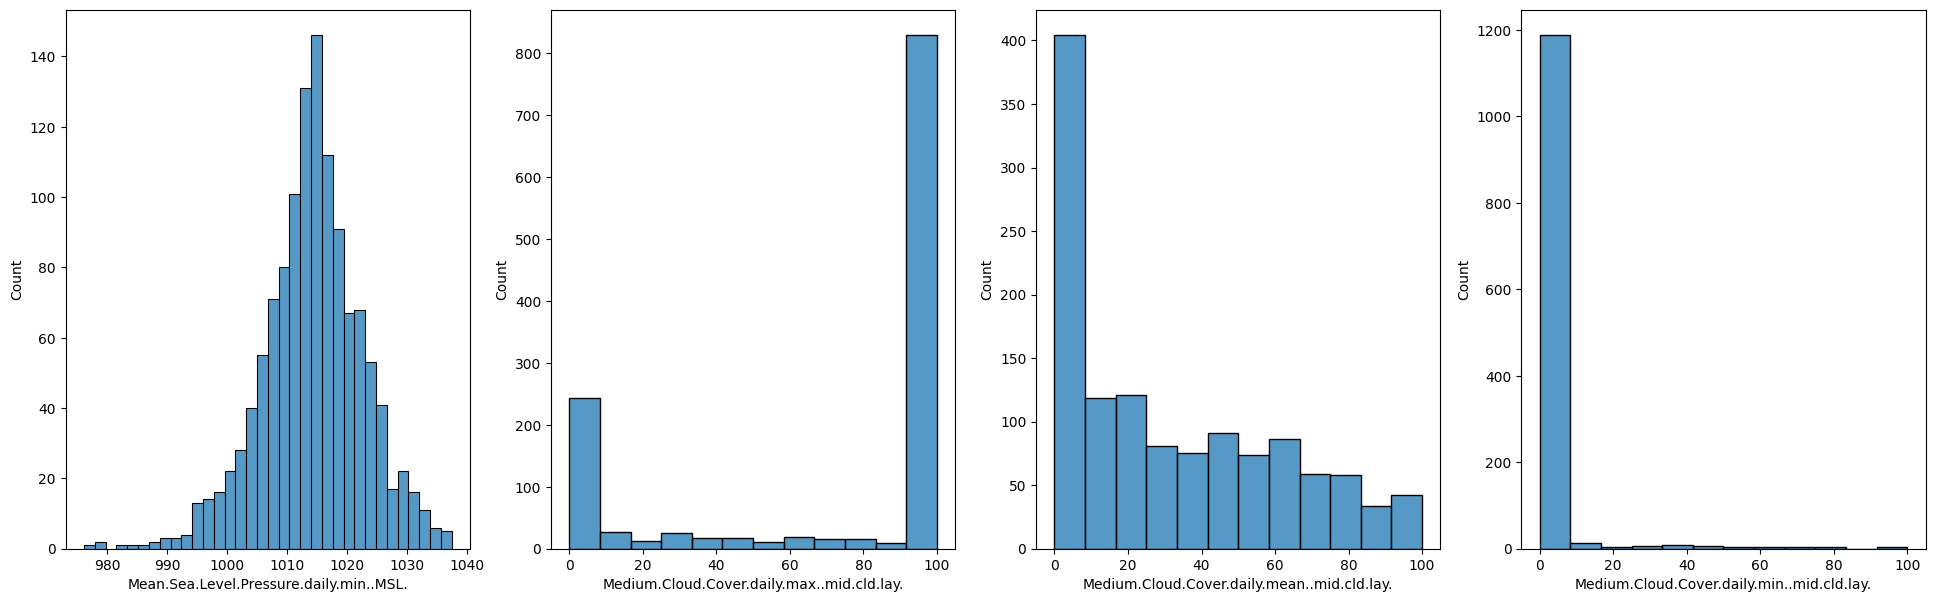

--------------------------------------------------------------------------------------------------------------------------------------------------------


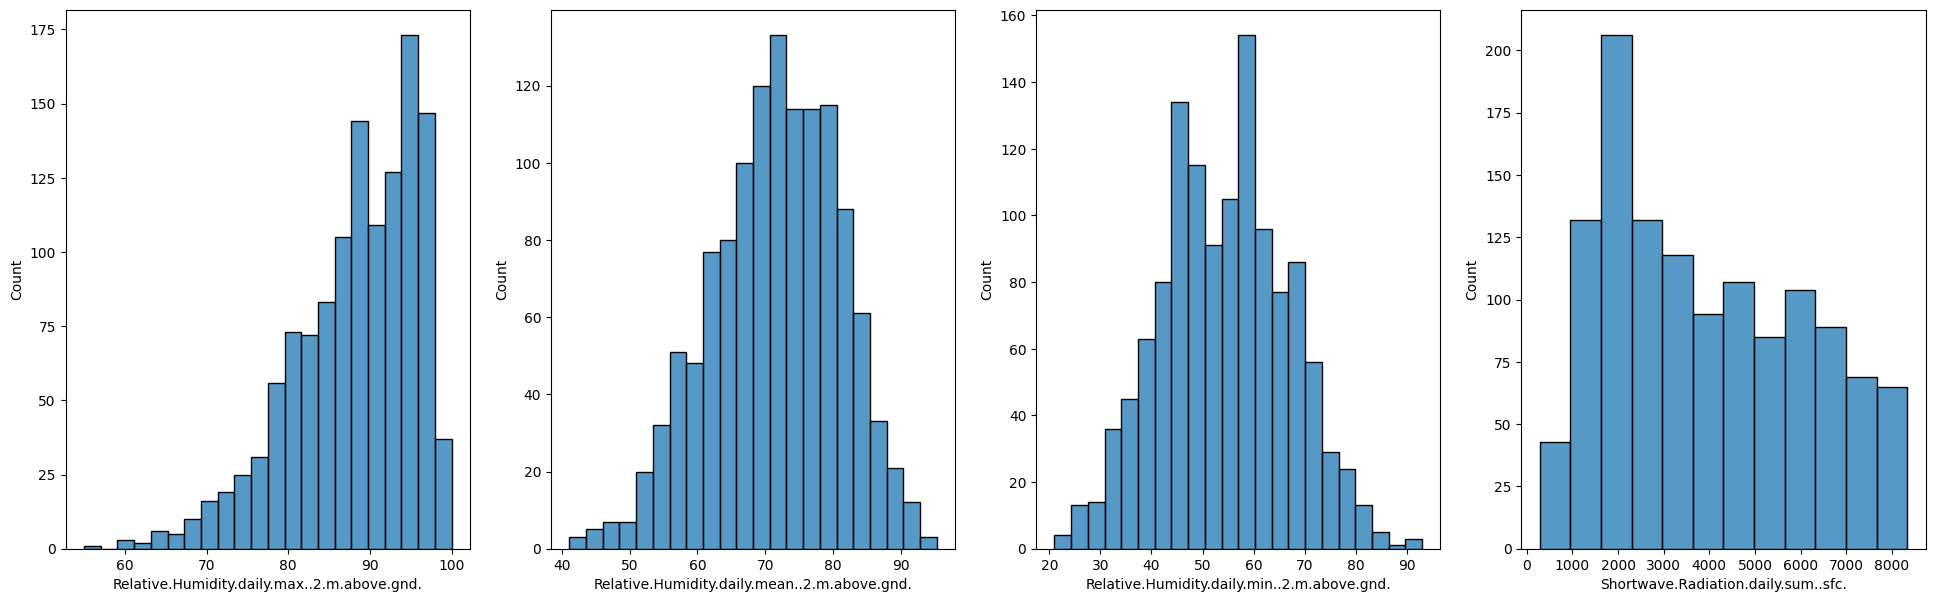

--------------------------------------------------------------------------------------------------------------------------------------------------------


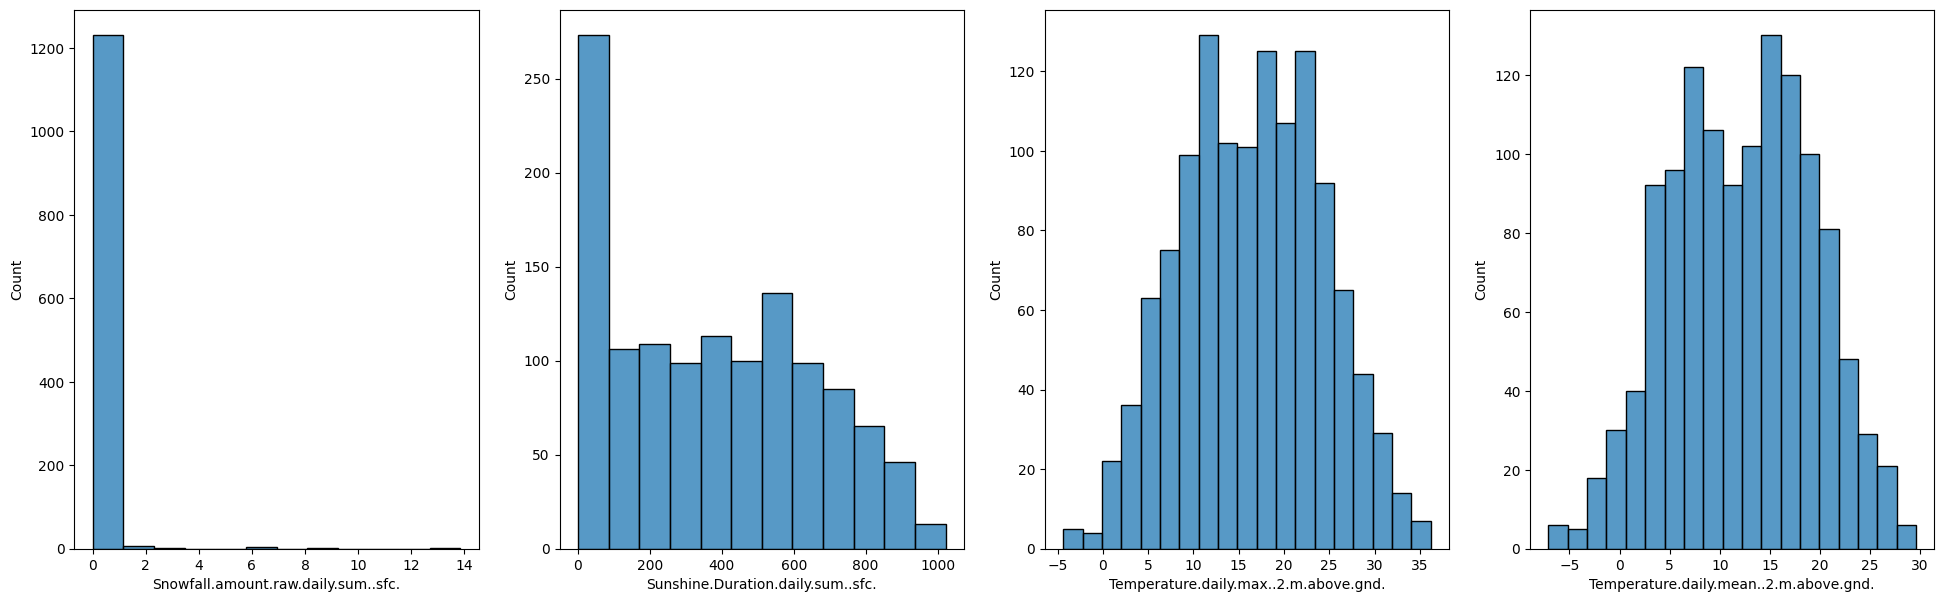

--------------------------------------------------------------------------------------------------------------------------------------------------------


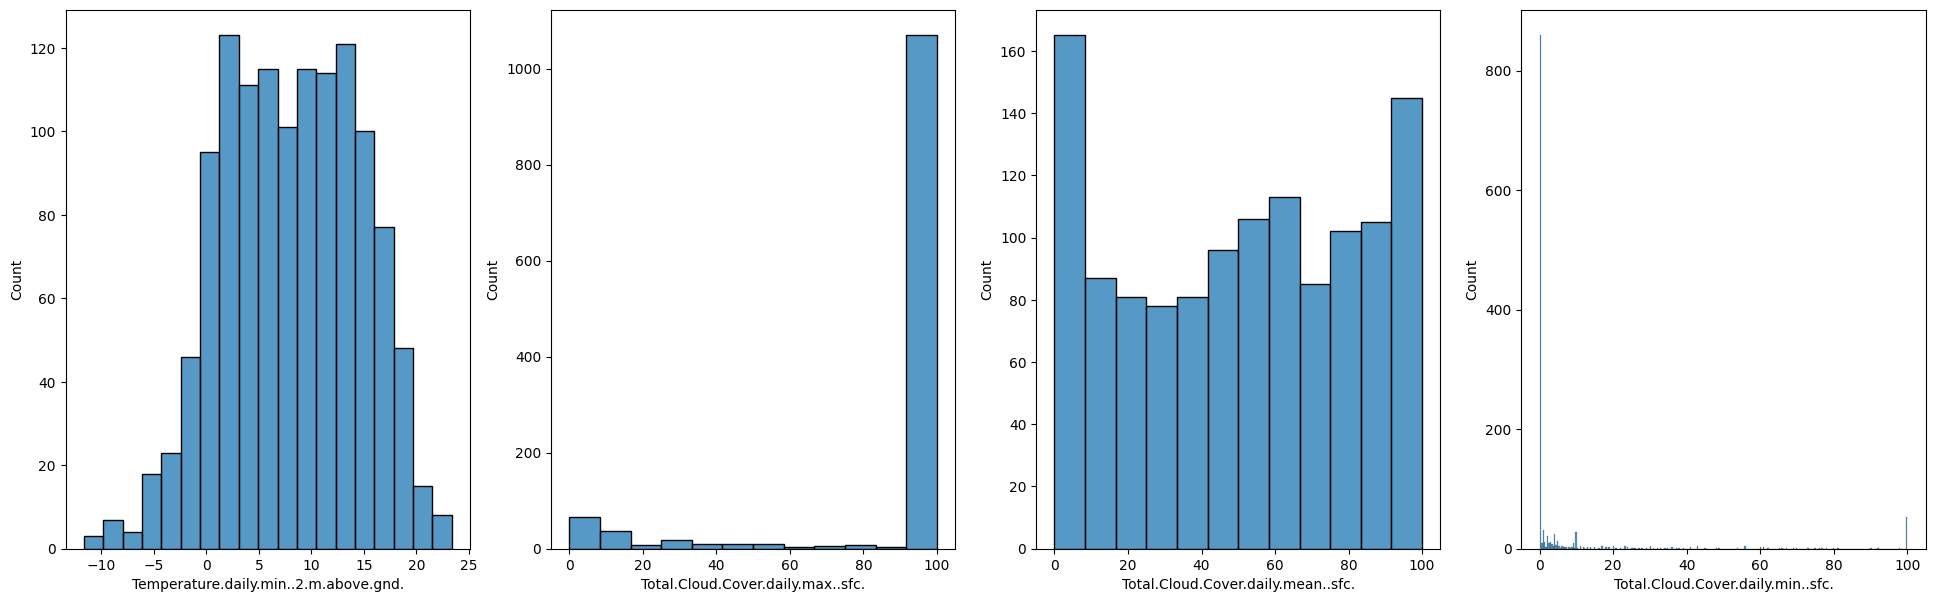

--------------------------------------------------------------------------------------------------------------------------------------------------------


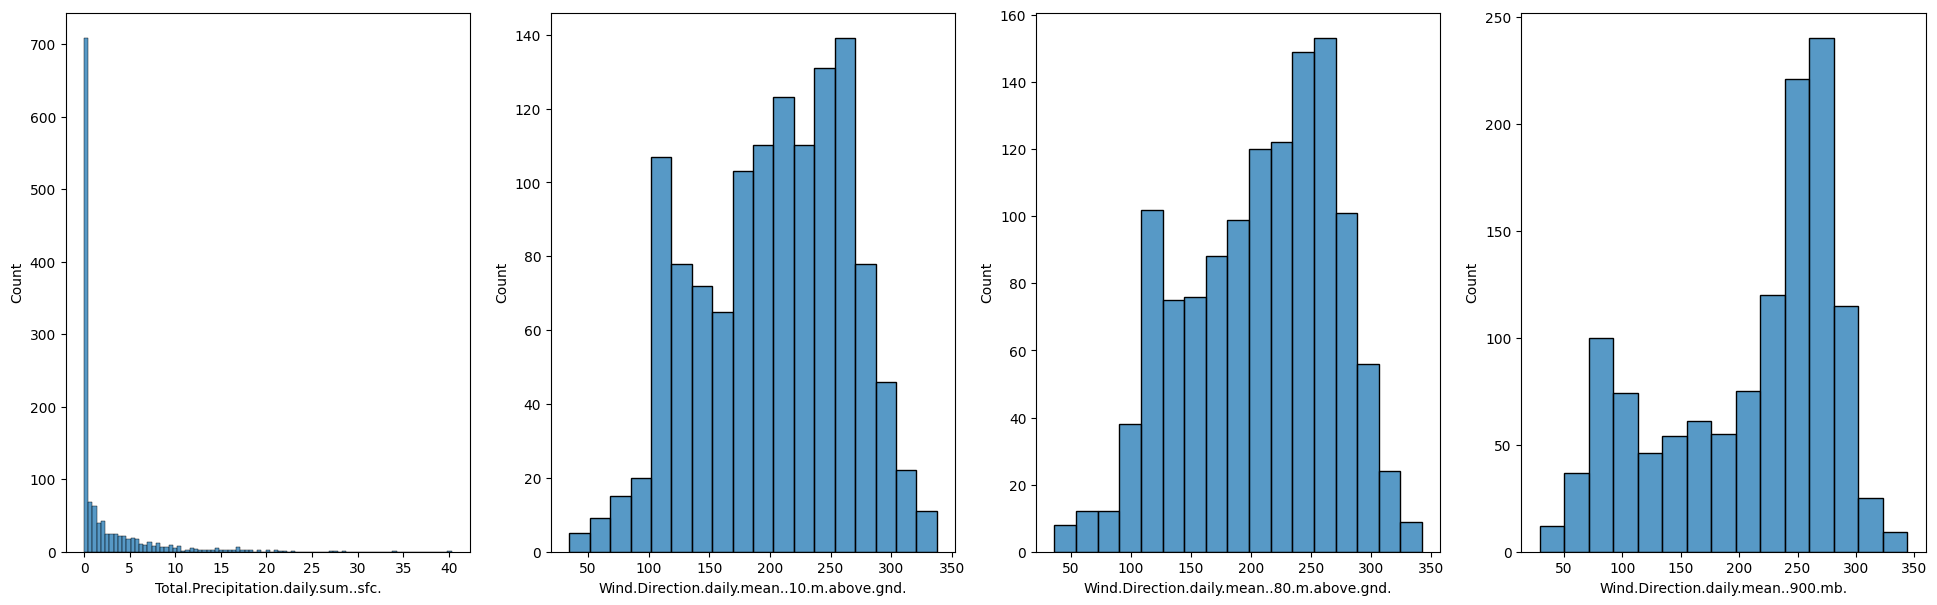

--------------------------------------------------------------------------------------------------------------------------------------------------------


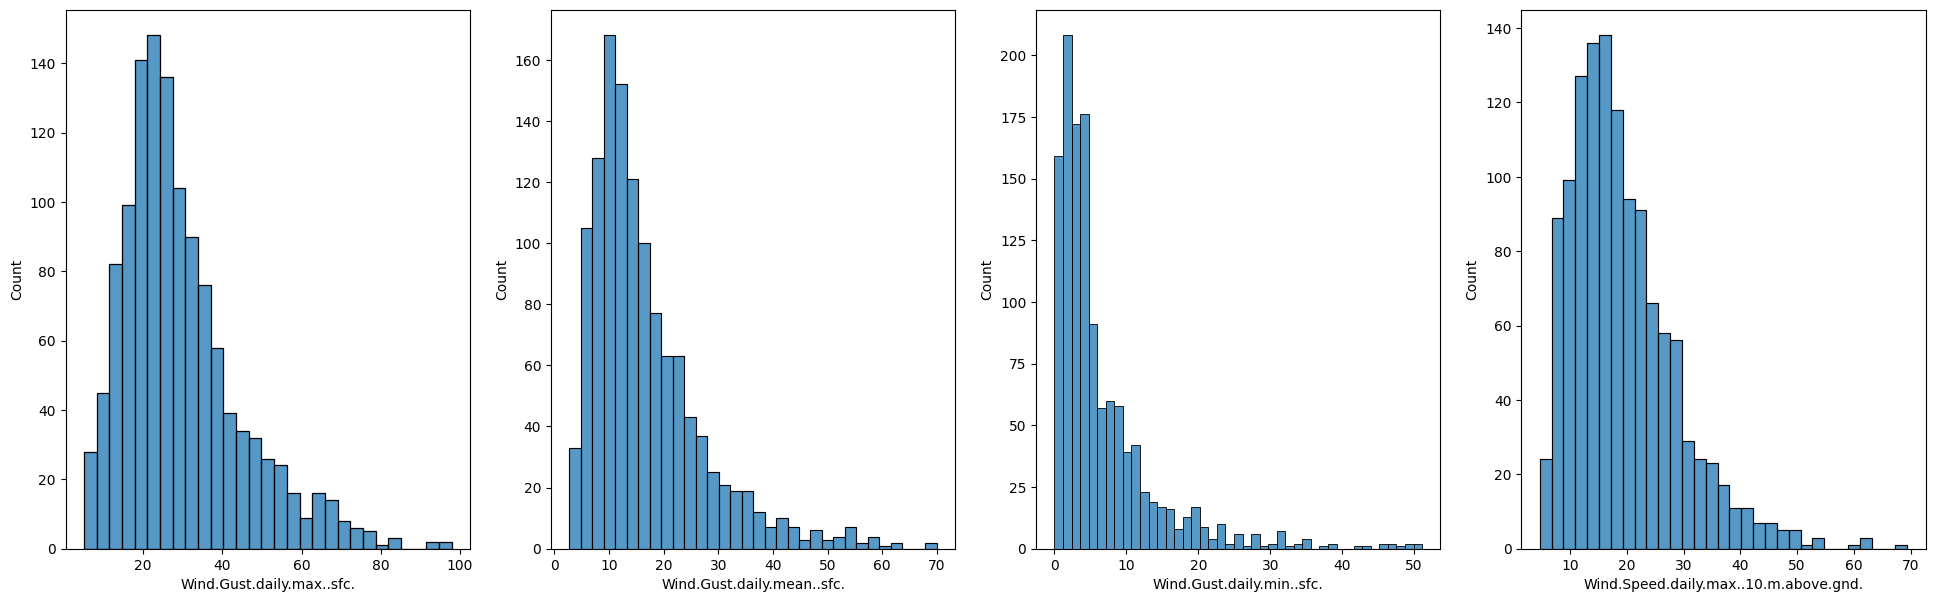

--------------------------------------------------------------------------------------------------------------------------------------------------------


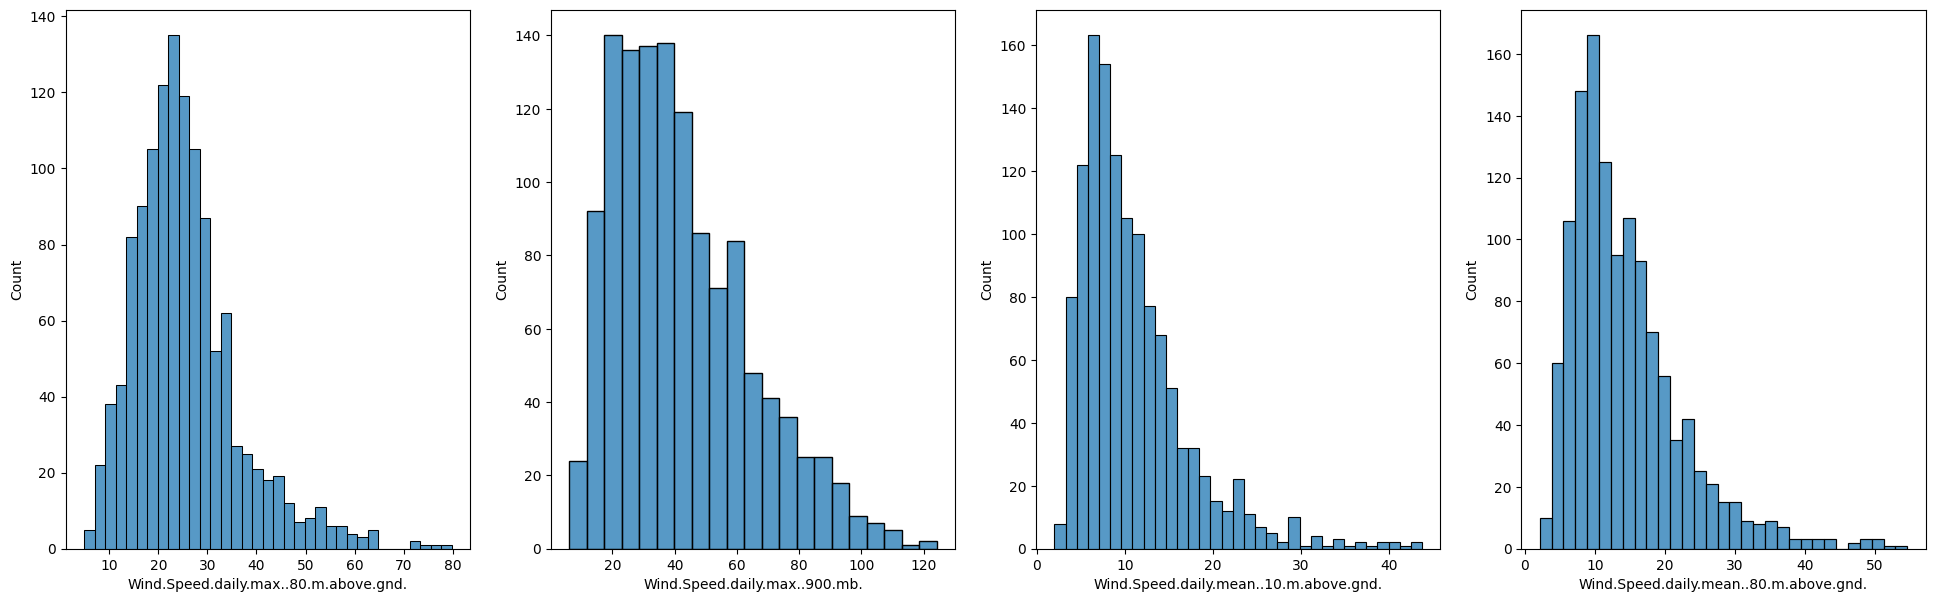

--------------------------------------------------------------------------------------------------------------------------------------------------------


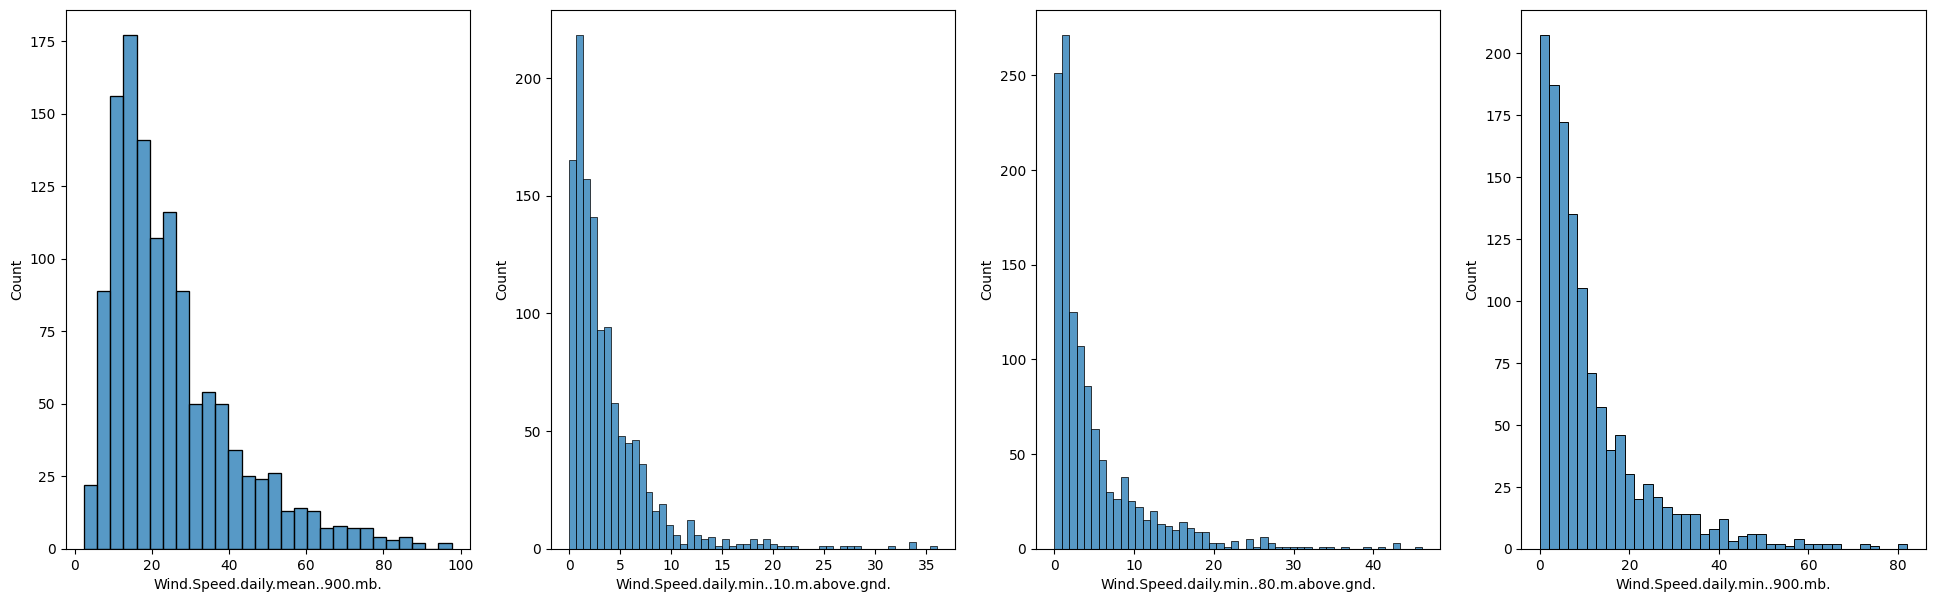

--------------------------------------------------------------------------------------------------------------------------------------------------------


In [ ]:
for i in range(10):
    # Calcul de l'indice de départ pour chaque itération
    indice_depart = i * 4

    # Sélection des 4 éléments consécutifs
    elements_consecutifs = numerique[indice_depart:indice_depart + 4]
    plt.rcParams["figure.figsize"]
    fig, axs = plt.subplots(1,4, figsize=(24,7))
    for i, feature in enumerate(elements_consecutifs):
      sns.histplot(dataset[feature], ax = axs[i])
    plt.show()


    # Affichage des éléments sélectionnés
    print(f"--------------------------------------------------------------------------------------------------------------------------------------------------------")


En fonction du grand nombre de variables, nous nous concentrerons sur l'explication d'une petite partie:

- Mean.Sea.Level.Pressure.daily.min..MSL.
- High.Cloud.Cover.daily.max..high.cld.lay.
- Relative.Humidity.daily.max..2.m.above.gnd.
- Total.Cloud.Cover.daily.mean..sfc.
- Wind.Speed.daily.mean..10.m.above.gnd.

Ce choix est juste aléatoire et résulte de l'observation des formes les plus récurrentes.

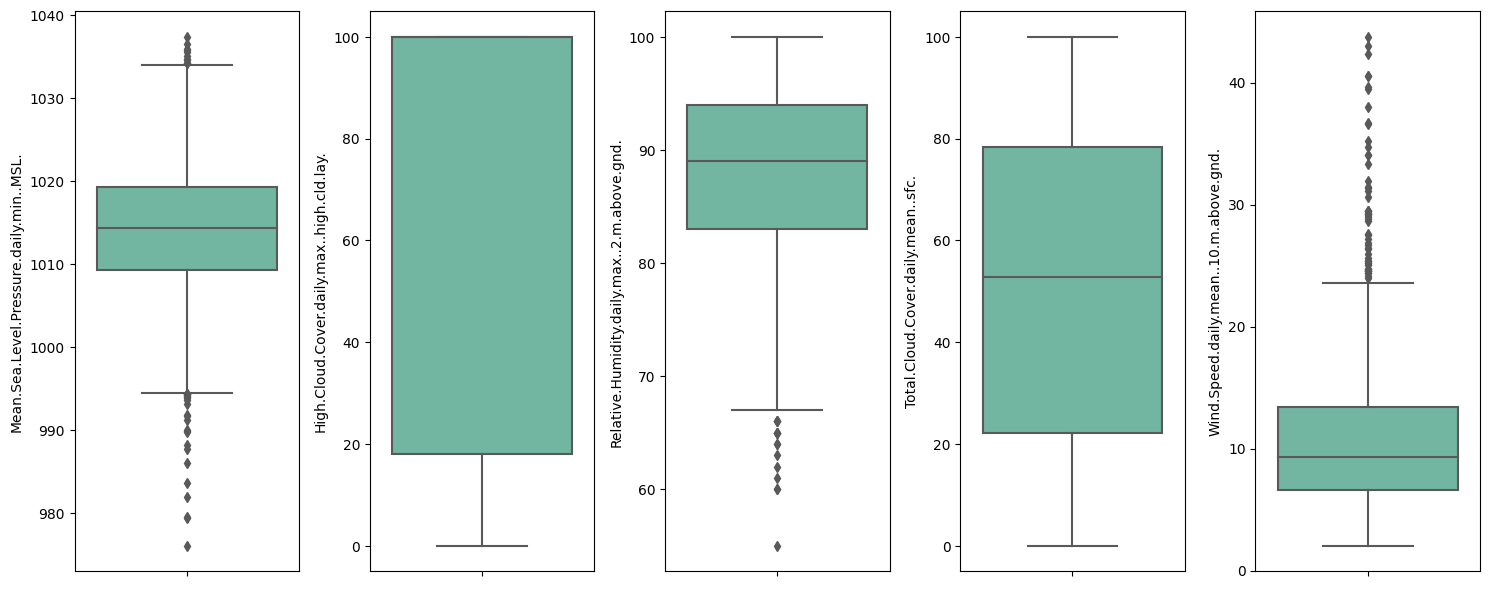

In [ ]:
variable_names = ['Mean.Sea.Level.Pressure.daily.min..MSL.', 'High.Cloud.Cover.daily.max..high.cld.lay.', 'Relative.Humidity.daily.max..2.m.above.gnd.', 'Total.Cloud.Cover.daily.mean..sfc.', 'Wind.Speed.daily.mean..10.m.above.gnd.']

# Créer des sous-graphiques pour chaque variable
fig, axes = plt.subplots(nrows=1, ncols=len(variable_names), figsize=(15, 6))

# Tracer les boxplots sur les sous-graphiques
for i, variable in enumerate(variable_names):
    sns.boxplot(y=variable, data=dataset, ax=axes[i], palette='Set2')

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()

# Afficher le graphique
plt.show()

- La variable "Mean.Sea.Level.Pressure.daily.min..MSL" possède un histogramme assez proche d'une gaussienne. Les variables sont plus ou moins bien réparties de part et d'autre de la moyenne. Sa boite à moustache illustre bien cette répartition. Mais montre quand même un certain nombre de valeurs abberantes.

- "High.Cloud.Cover.daily.max..high.cld.lay." a une médiane à 100. D'où la forme de sa boite à moustache. Une grande proportion des valeurs vaut 100. Et on observe une répartition inégale vis-à-vis des autres valeurs qui sont présentes en faible quantité.

- "Relative.Humidity.daily.max..2.m.above.gnd." : la fréquence des valeurs croit dans le même sens que ces dernières. La médiane est alors proche des grandes valeurs. Et  un nombre important de valeurs abérantes est situé en dessous de la borne inférieure.

- "Total.Cloud.Cover.daily.mean..sfc." présente une boite à moustacle bien équilibrée avec une bonne répartition des valeurs de part et d'autre de la médiane. Comme le montre l'histogramme, les valeurs sont proches mais ne semblent suivre aucune distribution particulière.

- "Wind.Speed.daily.mean..10.m.above.gnd." : se comporte comme le troisième cas cité ci-dessus mais la médiane est cette fois-ci vers les valeurs faibles avec un grand nombre de valeur abbérantes au dessus de la borne supérieure de la boite à moustache. Cela se remarque également sur l'histogramme où les piques sont autour de 9.

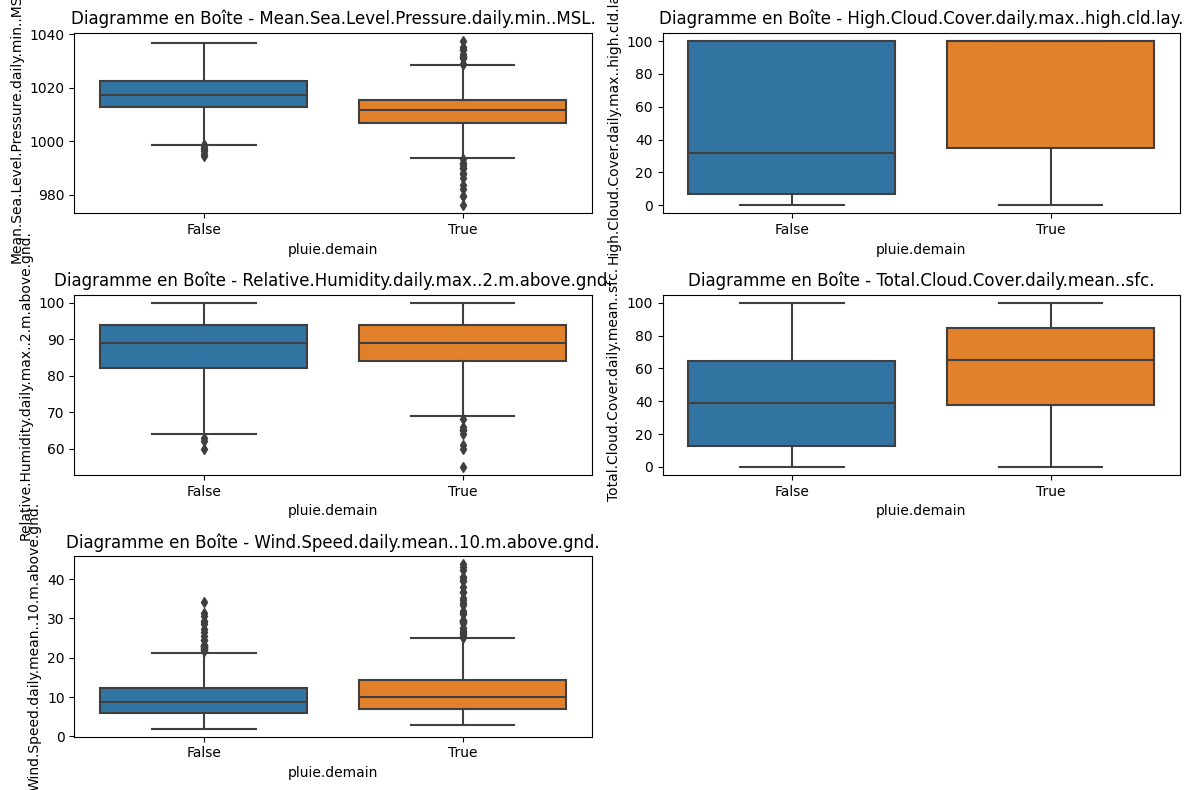

In [ ]:
# Calculer le nombre de sous-graphiques nécessaire
num_variables = len(variable_names)
num_cols = 2
num_rows = (num_variables + num_cols - 1) // num_cols
# Tracer des boxplots pour chaque variable en fonction de 'pluie.demain'
plt.figure(figsize=(12, 8))
for i, variable in enumerate(variable_names):
    plt.subplot(num_rows, num_cols, i+1)
    sns.boxplot(x='pluie.demain', y=variable, data=dataset)
    plt.title(f'Diagramme en Boîte - {variable}')

plt.tight_layout()
plt.show()


In [ ]:
dataset[variable_names + ['pluie.demain']].corr()

,Mean.Sea.Level.Pressure.daily.min..MSL.,High.Cloud.Cover.daily.max..high.cld.lay.,Relative.Humidity.daily.max..2.m.above.gnd.,Total.Cloud.Cover.daily.mean..sfc.,Wind.Speed.daily.mean..10.m.above.gnd.,pluie.demain
Mean.Sea.Level.Pressure.daily.min..MSL.,1.000000,-0.301735,-0.047529,-0.378594,-0.338463,-0.384147
High.Cloud.Cover.daily.max..high.cld.lay.,-0.301735,1.000000,0.054300,0.435705,0.082956,0.296449
Relative.Humidity.daily.max..2.m.above.gnd.,-0.047529,0.054300,1.000000,0.286792,-0.039315,0.035534
Total.Cloud.Cover.daily.mean..sfc.,-0.378594,0.435705,0.286792,1.000000,0.387378,0.293254
Wind.Speed.daily.mean..10.m.above.gnd.,-0.338463,0.082956,-0.039315,0.387378,1.000000,0.163939
pluie.demain,-0.384147,0.296449,0.035534,0.293254,0.163939,1.000000


 Aucune de ces 5 variables au vu des boxplots et du tableau précédent ne semble spécifiquement corrélée à la target

In [ ]:
dataset_ = dataset.drop(to_remove, axis=1)

dataset_.corr()

 Il en est de même pour les autres variables aussi qui ne semblent pas spécifiquement trop corrélées à la target. Ou ne le sont que dans de moindres mesures.

In [ ]:
# Calculer la matrice de corrélation
correlation_matrix = dataset_.corr()

# Définir un seuil de corrélation (à ajuster selon vos critères)
seuil_correlation = 0.8

# Initialiser une liste pour stocker les paires de variables fortement corrélées
paires_correlees = []

# Récupérer les paires de colonnes dont la corrélation (positive ou négative) est supérieure au seuil
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > seuil_correlation:
            paire = [correlation_matrix.columns[i], correlation_matrix.columns[j]]
            paires_correlees.append(paire)

# Afficher la liste des paires de variables fortement corrélées
print(len(paires_correlees))
#print(paires_correlees)


40


A cette étape, on peut par exemple supprimer les variables fortement corrélées entre elles. Il existe 40 paires

In [ ]:
# Calculer la corrélation avec la colonne 'pluie.demain'
correlation_with_target = dataset_.corr()['pluie.demain']

# Sélectionner les variables avec une corrélation > 0.3
variables_selectionnees = correlation_with_target[abs(correlation_with_target) > 0.3]

# Trier les variables par leur coefficient de corrélation
variables_triees = variables_selectionnees.sort_values(ascending=True)

# Afficher les variables triées
print(variables_triees)

Mean.Sea.Level.Pressure.daily.min..MSL.       -0.384147
Mean.Sea.Level.Pressure.daily.mean..MSL.      -0.378225
Mean.Sea.Level.Pressure.daily.max..MSL.       -0.362921
Medium.Cloud.Cover.daily.mean..mid.cld.lay.    0.357432
Medium.Cloud.Cover.daily.max..mid.cld.lay.     0.357519
pluie.demain                                   1.000000
Name: pluie.demain, dtype: float64


Seules 5 variables ont en valeur absolue une corrélation plus grande que 0.3 avec notre variable à prédire

# Modèle de prédiction

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import cross_val_score

from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [ ]:
X = dataset_[[col for col in dataset_.columns if col != 'pluie.demain']]

y = dataset_['pluie.demain']

X.shape, y.shape

((1244, 41), (1244,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rfc = RandomForestClassifier(random_state=42, min_samples_split=2, n_estimators=50)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=42)

In [ ]:
print(f"Baseline accuracy on test data: {rfc.score(X_test, y_test):.2}")

Baseline accuracy on test data: 0.71


On obtient une accuracy de 71%

In [ ]:
scores = cross_val_score(rfc, X, y, cv=6)
scores.mean()

0.6937205809488418

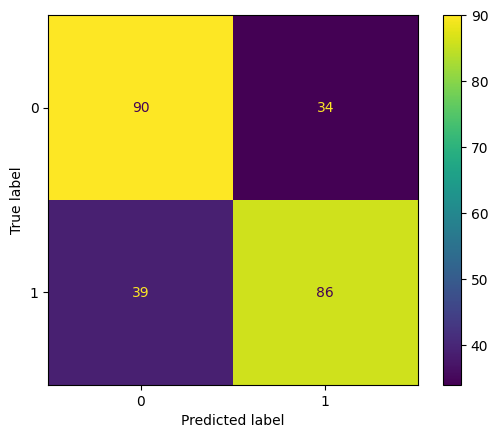

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

y_pred = rfc.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()

Text(0.5, 0.98, 'ROC curve comparison')

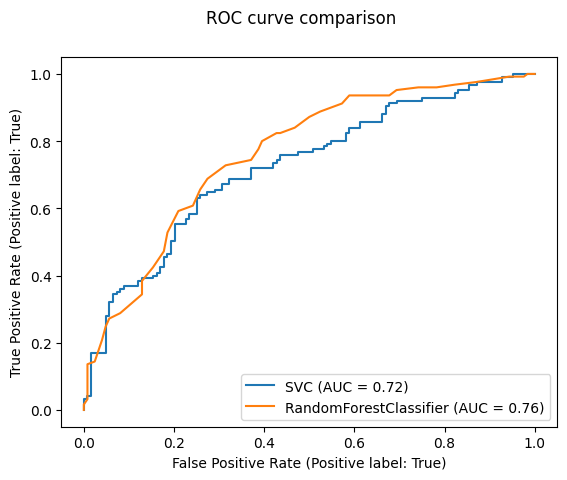

In [ ]:
svc = SVC(random_state=42)
svc.fit(X_train, y_train)


svc_disp = RocCurveDisplay.from_estimator(svc, X_test, y_test)
rfc_disp = RocCurveDisplay.from_estimator(rfc, X_test, y_test, ax=svc_disp.ax_)
rfc_disp.figure_.suptitle("ROC curve comparison")

En comparaison avec une SVC, le Random Forest semble mieux performer.

Nous ferons de la recherche meilleurs paramètres avec ce dernier donc.

In [ ]:
from sklearn.model_selection import GridSearchCV


# Créer un RandomForestClassifier
rf_classifier = RandomForestClassifier()

# Définir la grille de paramètres à rechercher
param_grid = {
    'n_estimators': [10, 25, 50, 100],
    'min_samples_split': [2, 5, 10],
    'random_state': [0, 42]
}

# Créer un objet GridSearchCV
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Effectuer la recherche de paramètres sur les données d'entraînement
grid_search.fit(X_train, y_train)

# Afficher les meilleurs paramètres trouvés
print("Meilleurs paramètres:", grid_search.best_params_)

# Évaluer la performance du modèle sur les données de test
accuracy = grid_search.best_estimator_.score(X_test, y_test)
print("Précision sur les données de test:", accuracy)

Meilleurs paramètres: {'min_samples_split': 2, 'n_estimators': 100, 'random_state': 0}
Précision sur les données de test: 0.714859437751004


Les meilleurs paramètres sont :
- 'min_samples_split': 2
- 'n_estimators': 100
- 'random_state': 0

La précision sur les données de test est de: 71.49%

# Regression Logistique

Enfin nous implémenterons un modèle simple de regression logistique pour comparer.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(X)

In [ ]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(max_iter = 100, random_state = 0)
logistic_model.fit(X_train, y_train)

logistic_test_score = logistic_model.score(X_test, y_test)
print('Test set accuracy using Logistic Regression:', logistic_test_score * 100)

Test set accuracy using Logistic Regression: 67.06827309236948


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


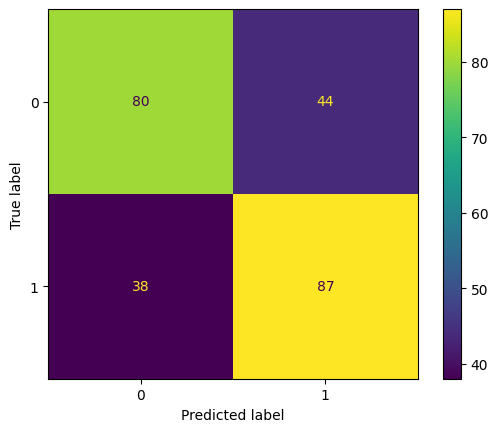

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

y_pred = logistic_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()